# Identify hot and cold spots of high casualty risk rate or casualty location rate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import geopandas as gpd
import itertools



In [2]:
lsoa_space = gpd.read_file('data/London/LSOA_2011_London_gen_MHW.shp').to_crs('EPSG:4326')
lsoa_space.rename(columns={'LSOA11CD':'lsoa'}, inplace=True)

# 提取 lsoa_space GeoDataFrame 中的 'lsoa' 列并转换为列表
lsoa_list_from_gdf = lsoa_space['lsoa'].tolist()
# len(lsoa_list_from_gdf) #4835

# lsoa_space


In [213]:
collision_all = pd.read_csv('data/dft-road-casualty-statistics-collision-last-5-years.csv')

# 使用geopandas中的points_from_xy函数创建geometry列
collision_all['geometry'] = gpd.points_from_xy(collision_all['longitude'], collision_all['latitude'], crs="EPSG:4326")
# 将DataFrame转换为GeoDataFrame
collision_all = gpd.GeoDataFrame(collision_all, geometry='geometry', crs="EPSG:4326")
collision_all.rename(columns={'lsoa_of_accident_location':'lsoa'}, inplace=True)

collision_2021 = collision_all[collision_all['accident_year'] == 2021]
collision_2022 = collision_all[collision_all['accident_year'] == 2022]
collision_2023 = collision_all[collision_all['accident_year'] == 2023]

# 使用新的 lsoa_list 对 gdf_collision 进行过滤，并选择lsoa_of_accident_location和geometry列
collision_2021 = collision_2021[collision_2021['lsoa'].isin(lsoa_list_from_gdf)]
collision_2022 = collision_2022[collision_2022['lsoa'].isin(lsoa_list_from_gdf)]
collision_2023 = collision_2023[collision_2023['lsoa'].isin(lsoa_list_from_gdf)]

collision_2023
# collision_2023.plot(markersize=0.05)


C:\Users\YU\AppData\Local\Temp\ipykernel_36296\3929937235.py:1: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  collision_all = pd.read_csv('data/dft-road-casualty-statistics-collision-last-5-years.csv')


accident_index  accident_year accident_reference  \
415826  2023010419171           2023          010419171   
415827  2023010419183           2023          010419183   
415828  2023010419189           2023          010419189   
415829  2023010419191           2023          010419191   
415830  2023010419192           2023          010419192   
...               ...            ...                ...   
503689  2023481407567           2023          481407567   
503690  2023481409647           2023          481409647   
503691  2023481409652           2023          481409652   
503692  2023481409658           2023          481409658   
503693  2023481409665           2023          481409665   

        location_easting_osgr  location_northing_osgr  longitude   latitude  \
415826               525060.0                170416.0  -0.202878  51.418974   
415827               535463.0                198745.0  -0.042464  51.671155   
415828               508702.0                177696.0  -0.435789  51.487777   
415829               520341.0                190175.0  -0.263972  51.597575   
415830               527255.0                176963.0  -0.168976  51.477324   
...                       ...                     ...        ...        ...   
503689               531350.0                181567.0  -0.108331  51.517763   
503690               531556.0                181647.0  -0.105334  51.518434   
503691               533386.0                181660.0  -0.078970  51.518122   
503692               531594.0                181423.0  -0.104870  51.516412   
503693               533109.0                181448.0  -0.083040  51.516282   

        police_force  accident_severity  number_of_vehicles  ...  \
415826             1                  3                   1  ...   
415827             1                  3                   3  ...   
415828             1                  3                   2  ...   
415829             1                  3                   2  ...   
415830             1                  3                   2  ...   
...              ...                ...                 ...  ...   
503689            48                  2                   1  ...   
503690            48                  2                   1  ...   
503691            48                  3                   1  ...   
503692            48                  3                   2  ...   
503693            48                  3                   2  ...   

        weather_conditions road_surface_conditions  \
415826                   8                       2   
415827                   1                       1   
415828                   1                       1   
415829                   9                       1   
415830                   1                       1   
...                    ...                     ...   
503689                   8                       2   
503690                   1                       1   
503691                   2                       2   
503692                   1                       1   
503693                   1                       2   

        special_conditions_at_site carriageway_hazards  urban_or_rural_area  \
415826                           0                   0                    1   
415827                           0                   0                    1   
415828                           0                   0                    1   
415829                           0                   0                    1   
415830                           0                   0                    1   
...                            ...                 ...                  ...   
503689                           0                   0                    1   
503690                           0                   0                    1   
503691                           0                   0                    1   
503692                           0                   0                    1   
503693        

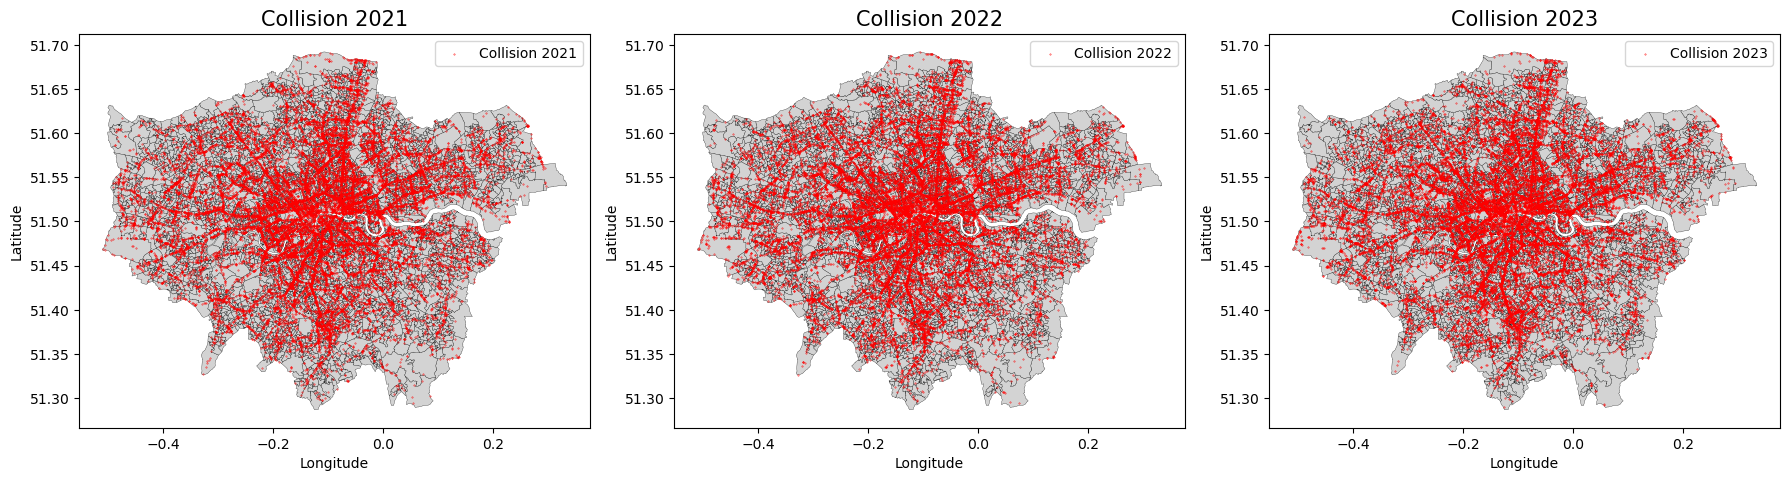

In [68]:
# 创建并列子图
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1行3列

# 设置标题列表
titles = ['Collision 2021', 'Collision 2022', 'Collision 2023']
collision_data = [collision_2021, collision_2022, collision_2023]

# 绘制每一年的事故数据
for i, ax in enumerate(axes):
    # 绘制 lsoa_space 边界图
    lsoa_space.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.2)

    # 绘制对应年份的事故点数据
    collision_data[i].plot(ax=ax, color='red', markersize=0.1, label=f'{titles[i]}')

    # 设置标题和标签
    ax.set_title(titles[i], fontsize=15)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.legend()

# 调整布局
plt.tight_layout()
plt.show()


In [5]:
lsoa_space

lsoa                   LSOA11NM   MSOA11CD  \
0     E01000001        City of London 001A  E02000001   
1     E01000002        City of London 001B  E02000001   
2     E01000003        City of London 001C  E02000001   
3     E01000005        City of London 001E  E02000001   
4     E01000006  Barking and Dagenham 016A  E02000017   
...         ...                        ...        ...   
4830  E01033742             Greenwich 007F  E02000319   
4831  E01033743             Greenwich 002H  E02000314   
4832  E01033744             Greenwich 007G  E02000319   
4833  E01033745             Greenwich 002I  E02000314   
4834  E01033746             Greenwich 038E  E02006931   

                      MSOA11NM    LAD11CD               LAD11NM    RGN11CD  \
0           City of London 001  E09000001        City of London  E12000007   
1           City of London 001  E09000001        City of London  E12000007   
2           City of London 001  E09000001        City of London  E12000007   
3           City of London 001  E09000001        City of London  E12000007   
4     Barking and Dagenham 016  E09000002  Barking and Dagenham  E12000007   
...                        ...        ...                   ...        ...   
4830             Greenwich 007  E09000011             Greenwich  E12000007   
4831             Greenwich 002  E09000011             Greenwich  E12000007   
4832             Greenwich 007  E09000011             Greenwich  E12000007   
4833             Greenwich 002  E09000011             Greenwich  E12000007   
4834             Greenwich 038  E09000011             Greenwich  E12000007   

     RGN11NM  USUALRES  HHOLDRES  COMESTRES  POPDEN  HHOLDS  AVHHOLDSZ  \
0     London      1465      1465          0   112.9     876        1.7   
1     London      1436      1436          0    62.9     830        1.7   
2     London      1346      1250         96   227.7     817        1.5   
3     London       985       985          0    52.0     467        2.1   
4     London      1703      1699          4   116.2     543        3.1   
...      ...       ...       ...        ...     ...     ...        ...   
4830  London      1352      1352          0   107.6     581        2.3   
4831  London      2038      2038          0    20.4     663        3.1   
4832  London      1845      1728        117   125.8     646        2.7   
4833  London      1820      1820          0    32.3     591        3.1   
4834  London      1464      1436         28   115.3     715        2.0   

                                               geometry  
0     POLYGON ((-0.09729 51.52158, -0.09652 51.52027...  
1     POLYGON ((-0.08813 51.51941, -0.08929 51.51752...  
2     POLYGON ((-0.09679 51.52325, -0.09647 51.52282...  
3     POLYGON ((-0.07323 51.51, -0.07553 51.50974, -...  
4     POLYGON ((0.09115 51.53909, 0.09326 51.53787, ...  
...                                                 ...  
4830  POLYGON ((0.0824 51.49886, 0.08415 51.49803, 0...  
4831  POLYGON ((0.11081 51.5098, 0.11227 51.50782, 0...  
4832  POLYGON ((0.08072 51.4955, 0.08165 51.49491, 0...  
4833  POLYGON ((0.10806 51.50135, 0.10664 51.50021, ...  
4834  POLYGON ((-0.0122 51.47792, -0.01238 51.4772, ...  

[4835 rows x 15 columns]

C:\Users\YU\AppData\Local\Temp\ipykernel_36296\3379742155.py:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # 使整体布局更紧凑


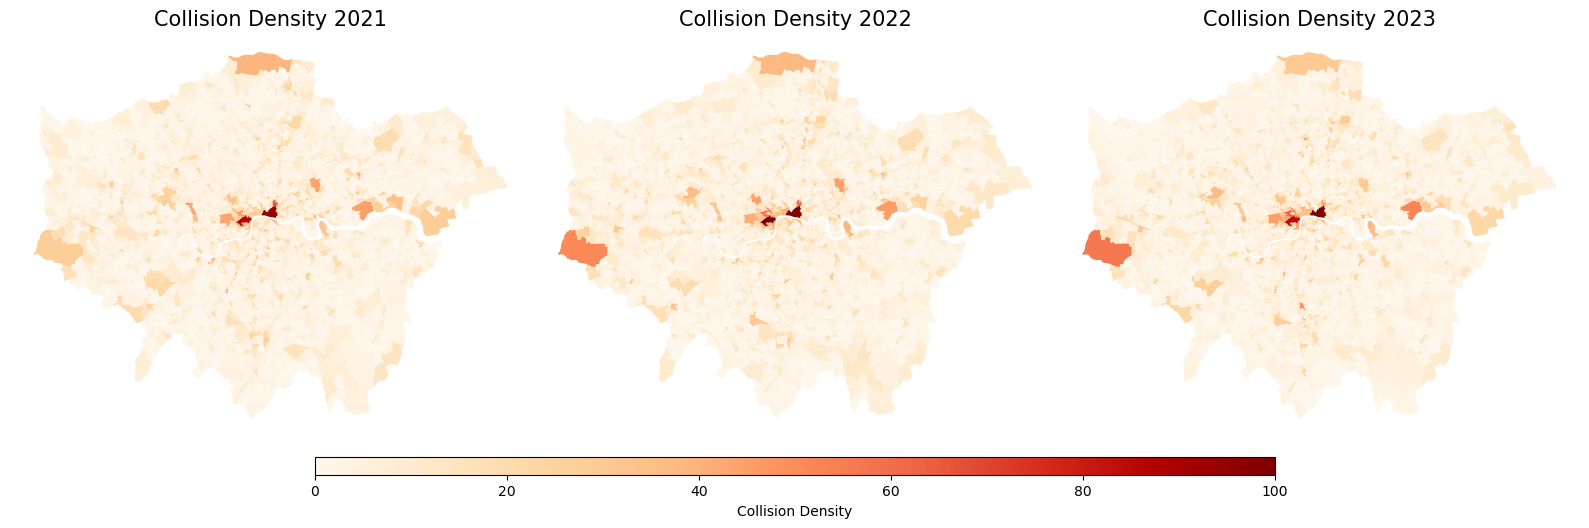

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import matplotlib.colorbar as colorbar
# from mpl_toolkits.axes_grid1 import make_axes_locatable

# # 创建竖向子图
# fig, axes = plt.subplots(1, 3, figsize=(16, 6))  # 1行3列

# # 设置标题列表
# titles = ['Collision Density 2021', 'Collision Density 2022', 'Collision Density 2023']
# collision_data = [collision_2021, collision_2022, collision_2023]

# # 设置颜色映射范围和 colormap
# vmin, vmax = 0, 100
# cmap = plt.get_cmap('OrRd')

# # 绘制每一年的事故密度图
# for i, ax in enumerate(axes):
#     # 空间连接：将事故点与 lsoa_space 区域匹配
#     joined = gpd.sjoin(collision_data[i], lsoa_space, how='left', predicate='within')

#     # 统计每个区域的事故点数量
#     density = joined.groupby('lsoa_right').size()
#     lsoa_space[f'collision_density_{i}'] = lsoa_space['lsoa'].map(density).fillna(0)

#     # 绘制密度图（不显示图例）
#     lsoa_space.plot(
#         column=f'collision_density_{i}', ax=ax, cmap=cmap,
#         vmin=vmin, vmax=vmax, edgecolor='none', legend=False
#     )

#     # 设置标题
#     ax.set_title(titles[i], fontsize=15)
#     ax.axis('off')  # 隐藏坐标轴

# # 创建共享图例
# cbar_ax = fig.add_axes([0.2, 0.1, 0.6, 0.03])  # 设置图例位置 [left, bottom, width, height]
# sm = cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
# cbar.set_label('Collision Density')

# # 调整子图之间的间隔
# plt.tight_layout()  # 使整体布局更紧凑
# plt.subplots_adjust(wspace=0.005)  # 缩小子图之间的间隔
# plt.show()


In [217]:
# Calculate area in square kilometers
lsoa_space = lsoa_space.to_crs(epsg=27700)  # 转换为英国投影坐标系
lsoa_space['area_km2'] = lsoa_space['geometry'].area / 1e6  # 转换为平方千米
lsoa_space = lsoa_space.to_crs(epsg=4326)  # 转回 WGS84

collision_data = [collision_2021, collision_2022, collision_2023]

# Loop through each year's data to calculate counts and densities
collision_densities = []  # To store density values for legend range calculation

for i, year_data in enumerate(collision_data):
    # Spatial join to match collisions to LSOA regions
    joined = gpd.sjoin(year_data, lsoa_space, how='left', predicate='within')

    # Calculate collision count for each LSOA
    collision_count = joined.groupby('lsoa_right').size()
    lsoa_space[f'collision_count_{i}'] = lsoa_space['lsoa'].map(collision_count).fillna(0)

    # Calculate collision density (count per km²)
    lsoa_space[f'collision_density_{i}'] = lsoa_space[f'collision_count_{i}'] / lsoa_space['area_km2']
    
    # Collect all densities for global legend range
    collision_densities.extend(lsoa_space[f'collision_density_{i}'])


C:\Users\YU\AppData\Local\Temp\ipykernel_36296\1425109694.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


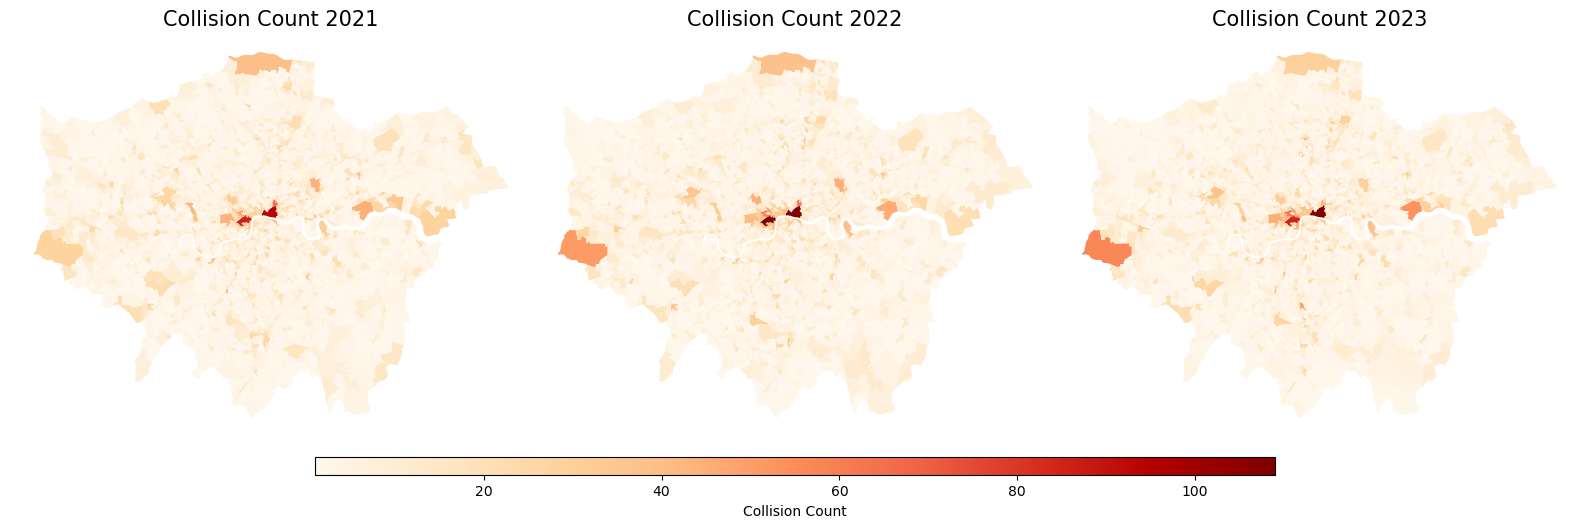

In [218]:

# Determine global min and max for density color mapping
vmin_count, vmax_count = np.min(collision_count), np.max(collision_count)

# 创建第一个图形：事故数量
fig1, axes1 = plt.subplots(1, 3, figsize=(16, 6))  # 1行3列

# 设置标题列表
titles = ['Collision Count 2021', 'Collision Count 2022', 'Collision Count 2023']

# 绘制每一年的事故数量图
for i, ax in enumerate(axes1):
    lsoa_space.plot(
        column=f'collision_count_{i}', ax=ax, cmap=cmap,
        vmin=vmin_count, vmax=vmax_count, edgecolor='none', legend=False
    )
    ax.set_title(titles[i], fontsize=15)
    ax.axis('off')  # 隐藏坐标轴

# 添加事故数量图例
cbar_ax1 = fig1.add_axes([0.2, 0.1, 0.6, 0.03])
sm_count = cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin_count, vmax=vmax_count))
cbar1 = fig1.colorbar(sm_count, cax=cbar_ax1, orientation='horizontal')
cbar1.set_label('Collision Count')

# 调整布局并显示
plt.tight_layout()
plt.subplots_adjust(wspace=0.005)
plt.show()


C:\Users\YU\AppData\Local\Temp\ipykernel_36296\1433881211.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


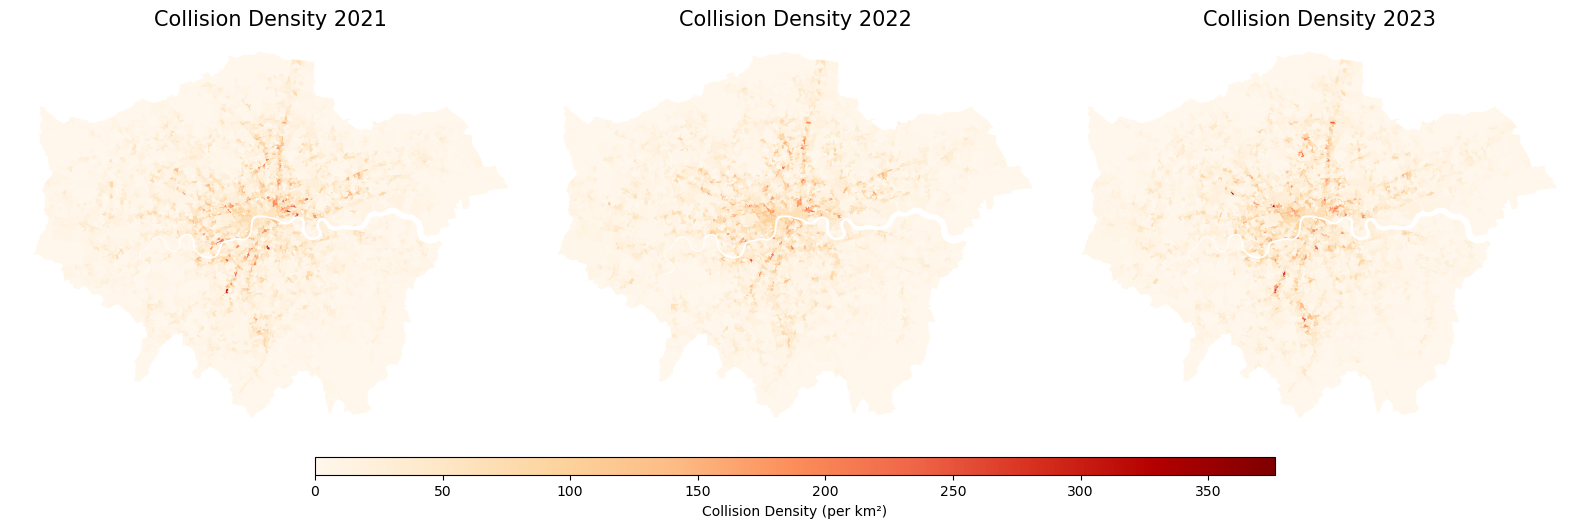

In [220]:
# Determine global min and max for density color mapping
vmin_density, vmax_density = np.min(collision_densities), np.max(collision_densities)

# 创建第二个图形：事故密度
fig2, axes2 = plt.subplots(1, 3, figsize=(16, 6))  # 1行3列

# 设置标题列表
titles = ['Collision Density 2021', 'Collision Density 2022', 'Collision Density 2023']

# 绘制每一年的事故密度图
for i, ax in enumerate(axes2):
    lsoa_space.plot(
        column=f'collision_density_{i}', ax=ax, cmap=cmap,
        vmin=vmin_density, vmax=vmax_density, edgecolor='none', legend=False
    ) 
    ax.set_title(titles[i], fontsize=15)
    ax.axis('off')  # 隐藏坐标轴

# 添加事故密度图例
cbar_ax2 = fig2.add_axes([0.2, 0.1, 0.6, 0.03])
sm_density = cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin_density, vmax=vmax_density))
cbar2 = fig2.colorbar(sm_density, cax=cbar_ax2, orientation='horizontal')
cbar2.set_label('Collision Density (per km²)')

# 调整布局并显示
plt.tight_layout()
plt.subplots_adjust(wspace=0.005)
plt.show()


In [210]:
lsoa_space

lsoa                   LSOA11NM   MSOA11CD  \
0     E01000001        City of London 001A  E02000001   
1     E01000002        City of London 001B  E02000001   
2     E01000003        City of London 001C  E02000001   
3     E01000005        City of London 001E  E02000001   
4     E01000006  Barking and Dagenham 016A  E02000017   
...         ...                        ...        ...   
4830  E01033742             Greenwich 007F  E02000319   
4831  E01033743             Greenwich 002H  E02000314   
4832  E01033744             Greenwich 007G  E02000319   
4833  E01033745             Greenwich 002I  E02000314   
4834  E01033746             Greenwich 038E  E02006931   

                      MSOA11NM    LAD11CD               LAD11NM    RGN11CD  \
0           City of London 001  E09000001        City of London  E12000007   
1           City of London 001  E09000001        City of London  E12000007   
2           City of London 001  E09000001        City of London  E12000007   
3           City of London 001  E09000001        City of London  E12000007   
4     Barking and Dagenham 016  E09000002  Barking and Dagenham  E12000007   
...                        ...        ...                   ...        ...   
4830             Greenwich 007  E09000011             Greenwich  E12000007   
4831             Greenwich 002  E09000011             Greenwich  E12000007   
4832             Greenwich 007  E09000011             Greenwich  E12000007   
4833             Greenwich 002  E09000011             Greenwich  E12000007   
4834             Greenwich 038  E09000011             Greenwich  E12000007   

     RGN11NM  USUALRES  HHOLDRES  ...  AVHHOLDSZ  \
0     London      1465      1465  ...        1.7   
1     London      1436      1436  ...        1.7   
2     London      1346      1250  ...        1.5   
3     London       985       985  ...        2.1   
4     London      1703      1699  ...        3.1   
...      ...       ...       ...  ...        ...   
4830  London      1352      1352  ...        2.3   
4831  London      2038      2038  ...        3.1   
4832  London      1845      1728  ...        2.7   
4833  London      1820      1820  ...        3.1   
4834  London      1464      1436  ...        2.0   

                                               geometry  collision_density  \
0     POLYGON ((-0.09729 51.52158, -0.09652 51.52027...                7.0   
1     POLYGON ((-0.08813 51.51941, -0.08929 51.51752...                2.0   
2     POLYGON ((-0.09679 51.52325, -0.09647 51.52282...                0.0   
3     POLYGON ((-0.07323 51.51, -0.07553 51.50974, -...               19.0   
4     POLYGON ((0.09115 51.53909, 0.09326 51.53787, ...                1.0   
...                                                 ...                ...   
4830  POLYGON ((0.0824 51.49886, 0.08415 51.49803, 0...                0.0   
4831  POLYGON ((0.11081 51.5098, 0.11227 51.50782, 0...                0.0   
4832  POLYGON ((0.08072 51.4955, 0.08165 51.49491, 0...                1.0   
4833  POLYGON ((0.10806 51.50135, 0.10664 51.50021, ...                2.0   
4834  POLYGON ((-0.0122 51.47792, -0.01238 51.4772, ...                0.0   

      collision_density_0 collision_density_1  collision_density_2  area_km2  \
0               30.002827           15.001414            52.504948  0.133321   
1               17.684148           39.789333             8.842074  0.226191   
2                0.000000            0.000000             0.000000  0.057303   
3               99.612684           78.641593            99.612684  0.190739   
4                0.000000            6.935012             6.935012  0.144196   
...                   ...                 ...                  ...       ...   
4830             0.000000            0.000000             0.000000  0.123309   
4831             0.000000            3.980681             0.000000  1.004853   
4832            13.135254            0.000000             6.567627  0.152262   
4833            10.743491  

In [223]:
count2021 = collision_2021['lsoa'].value_counts()
count2022 = collision_2022['lsoa'].value_counts()
count2023 = collision_2023['lsoa'].value_counts()
count2023

unique_selected_2021 = collision_2021[['lsoa']].drop_duplicates(subset='lsoa')
unique_selected_2021['count'] = unique_selected_2021['lsoa'].map(count2021)
unique_selected_2021

unique_selected_2022 = collision_2022[['lsoa']].drop_duplicates(subset='lsoa')
unique_selected_2022['count'] = unique_selected_2022['lsoa'].map(count2022)
unique_selected_2022

unique_selected_2023 = collision_2023[['lsoa']].drop_duplicates(subset='lsoa')
unique_selected_2023['count'] = unique_selected_2023['lsoa'].map(count2023)

unique_selected_2022 # 4263 rows × 2 columns
# unique_selected_2022


lsoa  count
309822  E01001883     13
309823  E01033745     16
309824  E01000378     16
309825  E01001529      7
309826  E01003673      3
...           ...    ...
399296  E01032740     41
399297  E01000005     11
399302  E01032739    110
399315  E01000002      8
399331  E01000001      2

[4263 rows x 2 columns]

In [212]:
information = pd.read_csv("data/lsoa-reference-data.csv")
information = information[information['Census Year'] == 2021]
information = information.rename(columns={'LSOA Code': 'lsoa'})
information

Census Year       lsoa   Road Length  Population  IMD Decile
4835         2021  E01000001   2855.474246        1475           9
4836         2021  E01000002   4288.325821        1384          10
4837         2021  E01000003   1073.346027        1616           5
4838         2021  E01000005   4528.304022        1103           3
4839         2021  E01000006   2703.273461        1845           5
...           ...        ...           ...         ...         ...
9824         2021  E01035718  17495.817160        2568           8
9825         2021  E01035719   1919.390834        1272           6
9826         2021  E01035720   2317.296223        1217           6
9827         2021  E01035721   5156.255294        2328           4
9828         2021  E01035722   3111.584369        2017           8

[4994 rows x 5 columns]

In [224]:
# 创建一个字典来存储每年的结果
results = {}

# 定义年份和对应的 unique_selected 数据
years = [2021, 2022, 2023]
unique_selected_data = [unique_selected_2021, unique_selected_2022, unique_selected_2023]

# 循环遍历每一年
for i, year in enumerate(years):
    # 合并数据
    res = pd.merge(lsoa_space[['lsoa', 'geometry']], unique_selected_data[i], on='lsoa', how='left')
    res = pd.merge(res, information, on='lsoa', how='left')
    res = res.rename(columns={'count':'count_collision'})

    # 计算指标
    res['casualty_length_rate'] = res['count_collision'] / res['Road Length'] * 1000
    
    # 填充缺失值
    # res['casualty_length_rate'] = res['casualty_length_rate'].fillna(0)

    median_length = res['Road Length'].median()
    res.loc[res['Road Length'].isna(), 'casualty_length_rate'] = (
        res.loc[res['Road Length'].isna(), 'count_collision'] / median_length * 1000)

    res.loc[res['count_collision'].isna(), 'casualty_length_rate'] = 0
    
    res = gpd.GeoDataFrame(res, geometry='geometry')

    # 将结果存储在字典中
    results[year] = res

# 访问每年的数据，例如：
res2021 = results[2021]
res2022 = results[2022]
res2023 = results[2023]

res2023

lsoa                                           geometry  \
0     E01000001  POLYGON ((-0.09729 51.52158, -0.09652 51.52027...   
1     E01000002  POLYGON ((-0.08813 51.51941, -0.08929 51.51752...   
2     E01000003  POLYGON ((-0.09679 51.52325, -0.09647 51.52282...   
3     E01000005  POLYGON ((-0.07323 51.51, -0.07553 51.50974, -...   
4     E01000006  POLYGON ((0.09115 51.53909, 0.09326 51.53787, ...   
...         ...                                                ...   
4830  E01033742  POLYGON ((0.0824 51.49886, 0.08415 51.49803, 0...   
4831  E01033743  POLYGON ((0.11081 51.5098, 0.11227 51.50782, 0...   
4832  E01033744  POLYGON ((0.08072 51.4955, 0.08165 51.49491, 0...   
4833  E01033745  POLYGON ((0.10806 51.50135, 0.10664 51.50021, ...   
4834  E01033746  POLYGON ((-0.0122 51.47792, -0.01238 51.4772, ...   

      count_collision  Census Year  Road Length  Population  IMD Decile  \
0                 7.0       2021.0  2855.474246      1475.0         9.0   
1                 2.0       2021.0  4288.325821      1384.0        10.0   
2                 NaN       2021.0  1073.346027      1616.0         5.0   
3                16.0       2021.0  4528.304022      1103.0         3.0   
4                 1.0       2021.0  2703.273461      1845.0         5.0   
...               ...          ...          ...         ...         ...   
4830              NaN       2021.0   840.206733      1339.0         7.0   
4831              NaN       2021.0  5520.035242      1941.0         5.0   
4832              NaN       2021.0  3063.978880      1803.0         3.0   
4833              2.0       2021.0  9274.556671      1783.0         4.0   
4834              1.0       2021.0  3258.289223      1471.0         4.0   

      casualty_length_rate  
0                 2.451432  
1                 0.466382  
2                 0.000000  
3                 3.533332  
4                 0.369922  
...                    ...  
4830              0.000000  
4831              0.000000  
4832              0.000000  
4833              0.215644  
4834              0.306910  

[4835 rows x 8 columns]

In [107]:
# # 创建一个 3 行 2 列的子图布局
# fig, axes = plt.subplots(3, 2, figsize=(12, 12))
# fig.suptitle("Casualty Rates by Year", fontsize=20, y=1.02)  # 总标题

# # 定义标题
# titles = ['2021', '2022', '2023']
# people_rate_range = (0, 60)   # 固定范围：0-80
# length_rate_range = (0, 15)   # 固定范围：0-18

# # 遍历每年的结果，绘制两种指标的地图
# for i, year in enumerate([2021, 2022, 2023]):
#     # 绘制 casualty_people_rate
#     results[year].plot(column='casualty_people_rate', ax=axes[i, 0], cmap='OrRd',
#                     legend=True, edgecolor='grey', linewidth=0.1,
#                     legend_kwds={'label': "Casualty Rate (per 1000 persons)"},
#                     vmin=people_rate_range[0], vmax=people_rate_range[1])  # 设置固定范围
    
#     axes[i, 0].set_title(f'Casualty People Rate - {year}')
#     axes[i, 0].axis('off')  # 隐藏坐标轴
    
#     # 绘制 casualty_length_rate
#     results[year].plot(column='casualty_length_rate', ax=axes[i, 1], cmap='YlGnBu',
#                     legend=True, edgecolor='grey', linewidth=0.1,
#                     legend_kwds={'label': "Casualty Rate (per km)"},
#                     vmin=length_rate_range[0], vmax=length_rate_range[1])
    
#     axes[i, 1].set_title(f'Casualty Length Rate - {year}')
#     axes[i, 1].axis('off')  # 隐藏坐标轴

# # 调整布局并显示图形
# plt.tight_layout()
# plt.show()


> We can find some central lsoa places are high in casualty people rate but low in casualty length rate, cos those roads are long.

<Axes: >

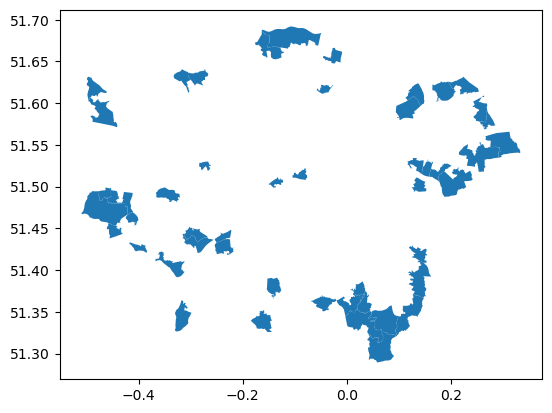

In [104]:
res2023.sort_values(by='Road Length', ascending=False).head(50).plot()

## Casualty rate (per 1000 persons)

In [142]:
casualty_all = pd.read_csv("data/dft-road-casualty-statistics-casualty-last-5-years.csv")

casualty_all = casualty_all[casualty_all['lsoa_of_casualty'].isin(lsoa_list_from_gdf)]

casualty_all = casualty_all[['accident_year','lsoa_of_casualty']].rename(columns={'lsoa_of_casualty': 'lsoa'})
# 按 'lsoa' 和 'accident_year' 分组并统计事故数量
summed_counts = casualty_all.groupby(['lsoa', 'accident_year']).size().reset_index()
# Rename columns for clarity (optional)
summed_counts.columns = ['lsoa', 'year','count_casualty']

cas2021 = summed_counts[summed_counts['year'] == 2021]
cas2022 = summed_counts[summed_counts['year'] == 2022]
cas2023 = summed_counts[summed_counts['year'] == 2023]

cas2023

C:\Users\YU\AppData\Local\Temp\ipykernel_36296\2666592960.py:1: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  casualty_all = pd.read_csv("data/dft-road-casualty-statistics-casualty-last-5-years.csv")


lsoa  year  count_casualty
1      E01000001  2023               1
8      E01000003  2023               4
12     E01000005  2023               2
17     E01000006  2023               6
22     E01000007  2023               4
...          ...   ...             ...
23430  E01033740  2023               3
23435  E01033741  2023              10
23440  E01033742  2023               5
23448  E01033744  2023               3
23457  E01033746  2023               1

[4673 rows x 3 columns]

In [225]:
# 创建一个字典来存储每年的结果
results = {}

# 定义年份和对应的 unique_selected 数据
years = [2021, 2022, 2023]
data = [cas2021, cas2022, cas2023]
data2 = [res2021, res2022, res2023]

# 循环遍历每一年
for i, year in enumerate(years):
    # 合并数据
    res = pd.merge(lsoa_space[['lsoa', 'geometry']], data[i], on='lsoa', how='left')
    res = pd.merge(res, information, on='lsoa', how='left')
    
    # 计算指标
    res['casualty_people_rate'] = res['count_casualty'] / res['Population'] * 1000
    # # 填充缺失值
    # res['casualty_people_rate'] = res['casualty_people_rate'].fillna(0)

        # res.loc[res['Population'].isna(), 'casualty_people_rate'] = res['count_casualty'] / res['Population'].median() * 1000
        
    # 仅对 Population 为 NaN 的行计算并赋值
    median_population = res['Population'].median()
    res.loc[res['Population'].isna(), 'casualty_people_rate'] = (
        res.loc[res['Population'].isna(), 'count_casualty'] / median_population * 1000)

    res.loc[res['count_casualty'].isna(), 'casualty_people_rate'] = 0

    res = pd.merge(res, data2[i][['count_collision', 'casualty_length_rate','lsoa']], on='lsoa', how='left')

    res = gpd.GeoDataFrame(res, geometry='geometry')

    # 将结果存储在字典中
    results[year] = res

# 访问每年的数据，例如：
res2021 = results[2021]
res2022 = results[2022]
res2023 = results[2023]



In [226]:
res2023[['count_casualty', 'Population','casualty_people_rate']]
res2023.loc[res2023['Population'].isna(),:]
# res2023.isna().sum()

lsoa                                           geometry    year  \
8     E01000010  POLYGON ((0.07751 51.53974, 0.07803 51.53934, ...  2023.0   
21    E01000023  POLYGON ((0.11402 51.55399, 0.11403 51.55355, ...  2023.0   
44    E01000048  POLYGON ((0.08377 51.53191, 0.0839 51.53178, 0...     NaN   
88    E01000092  POLYGON ((0.09884 51.53026, 0.09972 51.52994, ...  2023.0   
105   E01000109  POLYGON ((0.1454 51.56255, 0.14487 51.56162, 0...  2023.0   
...         ...                                                ...     ...   
4813  E01033725  POLYGON ((-0.46524 51.54526, -0.46465 51.54397...  2023.0   
4814  E01033726  POLYGON ((0.02897 51.46779, 0.02993 51.46592, ...  2023.0   
4818  E01033730  MULTIPOLYGON (((-0.01651 51.48134, -0.01712 51...  2023.0   
4819  E01033731  POLYGON ((0.07212 51.49315, 0.07352 51.49286, ...  2023.0   
4821  E01033733  POLYGON ((0.01454 51.4965, 0.01616 51.49578, 0...  2023.0   

      count_casualty  Census Year  Road Length  Population  IMD Decile  \
8                8.0          NaN          NaN         NaN         NaN   
21               2.0          NaN          NaN         NaN         NaN   
44               NaN          NaN          NaN         NaN         NaN   
88              29.0          NaN          NaN         NaN         NaN   
105              9.0          NaN          NaN         NaN         NaN   
...              ...          ...          ...         ...         ...   
4813             9.0          NaN          NaN         NaN         NaN   
4814            10.0          NaN          NaN         NaN         NaN   
4818             5.0          NaN          NaN         NaN         NaN   
4819             6.0          NaN          NaN         NaN         NaN   
4821             5.0          NaN          NaN         NaN         NaN   

      casualty_people_rate  count_collision  casualty_length_rate  
8                 4.634994             13.0              3.709815  
21                1.158749              6.0              1.712222  
44                0.000000              NaN              0.000000  
88               16.801854             28.0              7.990371  
105               5.214368              2.0              0.570741  
...                    ...              ...                   ...  
4813              5.214368              4.0              1.141482  
4814              5.793743             20.0              5.707408  
4818              2.896871              4.0              1.141482  
4819              3.476246             13.0              3.709815  
4821              2.896871              9.0              2.568334  

[176 rows x 11 columns]

In [229]:
res2023.count_collision.sum()

22914.0

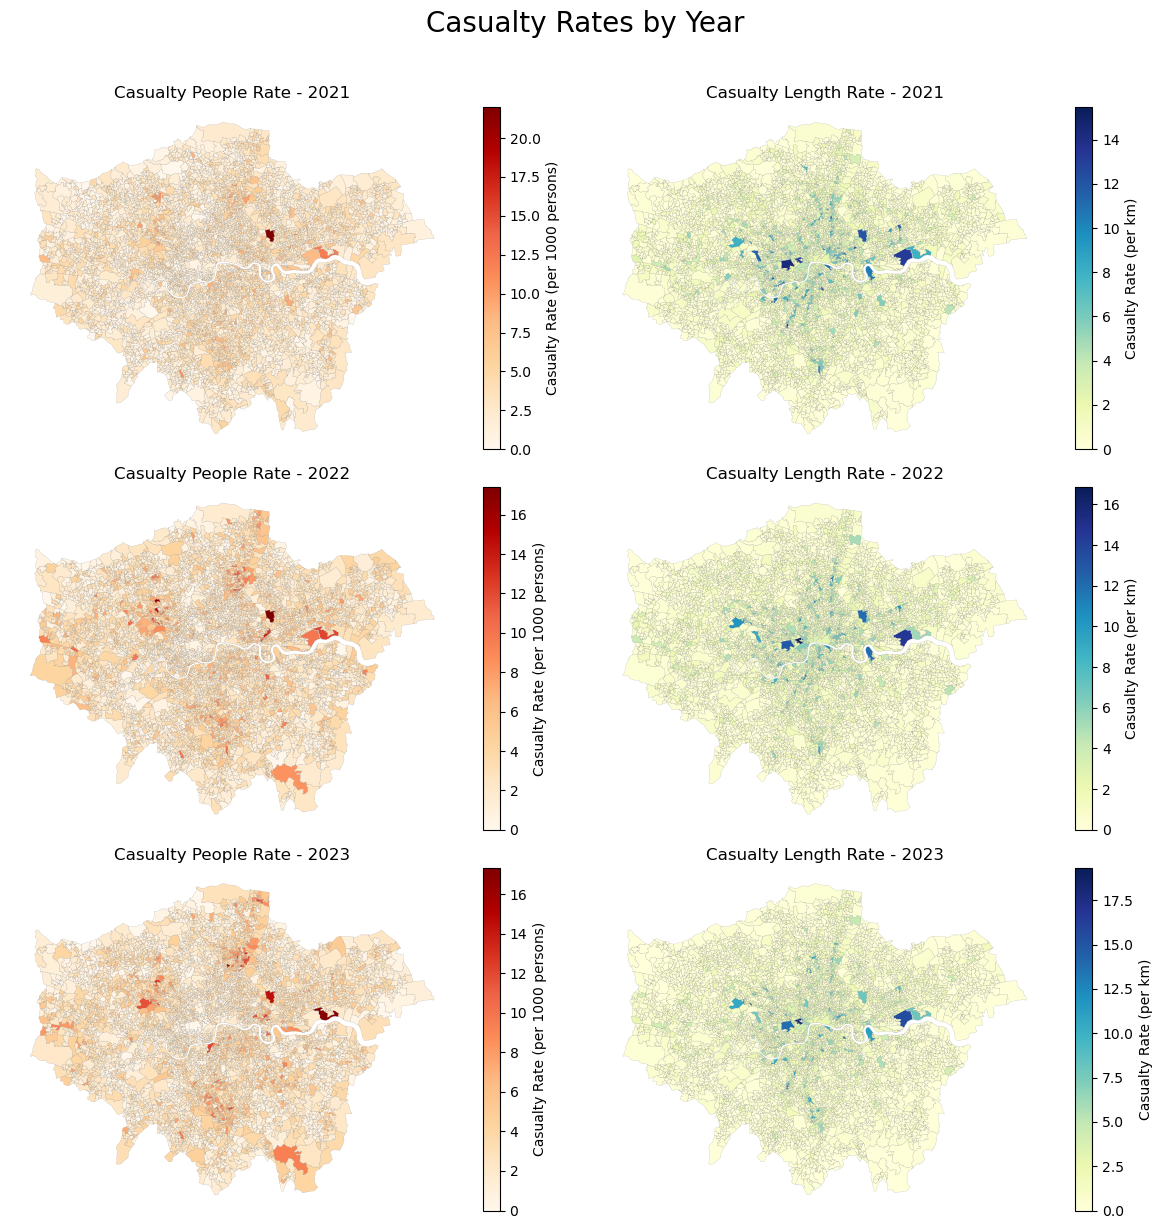

In [230]:
# 创建一个 3 行 2 列的子图布局
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle("Casualty Rates by Year", fontsize=20, y=1.02)  # 总标题

# 定义标题
titles = ['2021', '2022', '2023']
# people_rate_range = (0, 60)   # 固定范围：0-80
# length_rate_range = (0, 15)   # 固定范围：0-18

# 遍历每年的结果，绘制两种指标的地图
for i, year in enumerate([2021, 2022, 2023]):
    # 绘制 casualty_people_rate
    results[year].plot(column='casualty_people_rate', ax=axes[i, 0], cmap='OrRd',
                    legend=True, edgecolor='grey', linewidth=0.1,
                    legend_kwds={'label': "Casualty Rate (per 1000 persons)"},
                    )  # 设置固定范围 vmin=people_rate_range[0], vmax=people_rate_range[1]
    
    axes[i, 0].set_title(f'Casualty People Rate - {year}')
    axes[i, 0].axis('off')  # 隐藏坐标轴
    
    # 绘制 casualty_length_rate
    results[year].plot(column='casualty_length_rate', ax=axes[i, 1], cmap='YlGnBu',
                    legend=True, edgecolor='grey', linewidth=0.1,
                    legend_kwds={'label': "Casualty Rate (per km)"},
                    ) #vmin=length_rate_range[0], vmax=length_rate_range[1]
    
    axes[i, 1].set_title(f'Casualty Length Rate - {year}')
    axes[i, 1].axis('off')  # 隐藏坐标轴

# 调整布局并显示图形
plt.tight_layout()
plt.show()


In [233]:
res2021.to_file('data/results/res2021.gpkg', driver='gpkg')
res2022.to_file('data/results/res2022.gpkg', driver='gpkg')
res2023.to_file('data/results/res2023.gpkg', driver='gpkg')

# More in **Visualisation.Rmd**